In [ ]:
import pandas as pd
import numpy as np

In [ ]:
target_characters = np.array(['O', '/', '|', '\\backslash'])

In [8]:
import os

for i in range(1, 11):
    os.makedirs(f"data-cut/fold-{i}", exist_ok=True)
    df = pd.read_csv(f"classification-task/fold-{i}/train.csv")
    df = df[df['latex'].isin(target_characters)]
    df.to_csv(f"data-cut/fold-{i}/train_filtered.csv", index=False)
    df = pd.read_csv(f"classification-task/fold-{i}/test.csv")
    df = df[df['latex'].isin(target_characters)]
    df.to_csv(f"data-cut/fold-{i}/test_filtered.csv", index=False)

In [13]:
# merge train
df_train = pd.DataFrame()
for i in range(1, 11):
    df = pd.read_csv(f"data-cut/fold-{i}/train_filtered.csv")
    df_train = pd.concat([df_train, df], ignore_index=True)
df_train.to_csv("data-cut/train.csv", index=False)
del df_train

# merge test
df_test = pd.DataFrame()
for i in range(1, 11):
    df = pd.read_csv(f"data-cut/fold-{i}/test_filtered.csv")
    df_test = pd.concat([df_test, df], ignore_index=True)
df_test.to_csv("data-cut/test.csv", index=False)
del df_test

In [51]:
## merge train test
df_train = pd.read_csv("data-cut/train.csv")
df_test = pd.read_csv("data-cut/test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)
df.to_csv("data-cut/merged.csv", index=False)

In [52]:
def remove_duplicates(df):
    df = df.drop_duplicates(subset=['path'])
    return df

df_train = pd.read_csv("data-cut/train.csv")
df_train = remove_duplicates(df_train)
df_train.to_csv("data-cut/train.csv", index=False)

df_test = pd.read_csv("data-cut/test.csv")
df_test = remove_duplicates(df_test)
df_test.to_csv("data-cut/test.csv", index=False)

df = pd.read_csv("data-cut/merged.csv")
df = remove_duplicates(df)
df.to_csv("data-cut/merged.csv", index=False)

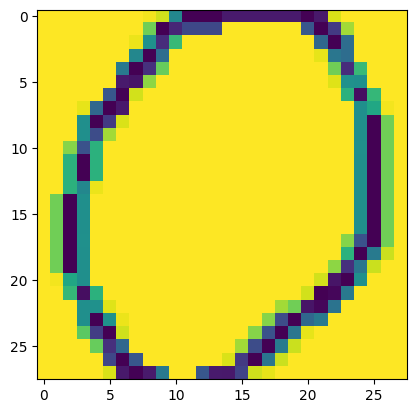

In [28]:
import cv2
import matplotlib.pyplot as plt

def idx_to_feature_vector(img_path):
    img_path = ''.join(img_path.split('../'))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.flatten()
    return img

vec = idx_to_feature_vector("../../hasy-data/v2-00149.png")
plt.imshow(vec.reshape(28, 28))

In [53]:
def convert_file(file_in, file_out):
    df = pd.read_csv(file_in)
    df['features'] = df['path'].apply(idx_to_feature_vector)
    for i in range(784):
        df[f'pixel_{i}'] = df['features'].apply(lambda x: x[i])
    df.drop(columns=['path', 'latex', 'features', 'user_id'], inplace=True)
    df.to_csv(file_out, index=False)

convert_file("data-cut/train.csv", "data-filter/train.csv")
convert_file("data-cut/test.csv", "data-filter/test.csv")
convert_file("data-cut/merged.csv", "data-filter/merged.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_24104\3091405618.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'pixel_{i}'] = df['features'].apply(lambda x: x[i])
C:\Users\Dell\AppData\Local\Temp\ipykernel_24104\3091405618.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'pixel_{i}'] = df['features'].apply(lambda x: x[i])
C:\Users\Dell\AppData\Local\Temp\ipykernel_24104\3091405618.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor

In [54]:
mapping_default = {
    'O': 45,
    '/': 922,
    '|': 920,
    '\\backslash': 949
}

map_class = {
    45: 1,
    922: 2,
    920: 3,
    949: 4
}

new_map_char = {
    1: 'O',
    2: '/',
    3: '|',
    4: '\\backslash'
}

def map_target(df, mapping):
    df['symbol_id'] = df['symbol_id'].map(mapping)
    return df

df_train = pd.read_csv("data-filter/train.csv")
df_train = map_target(df_train, map_class)
df_train.to_csv("data-filter/train.csv", index=False)

df_test = pd.read_csv("data-filter/test.csv")
df_test = map_target(df_test, map_class)
df_test.to_csv("data-filter/test.csv", index=False)

df = pd.read_csv("data-filter/merged.csv")
df = map_target(df, map_class)
df.to_csv("data-filter/merged.csv", index=False)

import json

with open("data-filter/new_map_char.json", "w") as f:
    json.dump(new_map_char, f)